<a href="https://colab.research.google.com/github/bagasdal/bagasdal/blob/main/Fruits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fruit classification


Bagas Daliyanto

In [ ]:
import os
import cv2

directory = '/content/drive/MyDrive/Fruits_360_Classification'
train_dir = os.path.join(directory,'Fruits_train')
test_dir = os.path.join(directory, 'Fruits_test')
# classes=["Apple Red 1","Avocado","Banana","BlueBerry","Corn","Dates","Eggplant",
#          "Grape Pink","Kiwi","Lemon","Mango","Orange","Pineapple","Rambutan",
#          "Salak","Strawberry","Watermelon"]

# Populate train data
file_name = []
tag = []
full_path = []
for path, subdirs, files in os.walk(train_dir, test_dir):
    for name in files:
        full_path.append(os.path.join(path, name)) 
        tag.append(path.split('/')[-1])            
        file_name.append(name)

# Populate test data
file_name2 = []
tag2 = []
full_path2 = []
for path, subdirs, files in os.walk(test_dir, test_dir):
    for name in files:
        full_path2.append(os.path.join(path, name)) 
        tag2.append(path.split('/')[-1])           
        file_name2.append(name)

# all_arrays=[]
# img_size=100
# for i in classes:
#     path=os.path.join(train_dir,i)
#     class_num=classes.index(i)
#     for img in os.listdir(path):
#         #img_array=cv2.imread(os.path.join(path,img),
#         #                     cv2.IMREAD_GRAYSCALE)
#         img_array=cv2.imread(os.path.join(path,img))
#         img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
#         #img_array=cv2.resize(img_array,(img_size,img_size))
#         all_arrays.append([img_array,class_num])

In [ ]:
print(os.listdir('/content/drive/MyDrive/Fruits_360_Classification/'))

['Fruits_train', 'Fruits_test']


In [ ]:
import pandas as pd

# create data frame
df = pd.DataFrame({'path': full_path, 'file_name': file_name, 'tag': tag})
df_test = pd.DataFrame({'path': full_path2, 'file_name': file_name2, 'tag': tag2})

# checking data size
df.groupby(['tag']).size()

tag
Apple Red 1    492
Avocado        427
Banana         490
Blueberry      462
Corn           450
Dates          490
Eggplant       468
Grape Pink     492
Kiwi           466
Lemon          492
Mango          490
Orange         479
Pineapple      490
Rambutan       492
Salak          490
Strawberry     492
Watermelon     475
dtype: int64

In [ ]:
df_test.groupby(['tag']).size()

tag
Apple Red 1    164
Avocado        143
Banana         166
Blueberry      154
Corn           150
Dates          166
Eggplant       156
Grape Pink     164
Kiwi           156
Lemon          164
Mango          166
Orange         160
Pineapple      166
Rambutan       164
Salak          162
Strawberry     164
Watermelon     157
dtype: int64

In [ ]:
df_gabungan = pd.concat([df, df_test], ignore_index=True)

In [ ]:
df_gabungan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10859 entries, 0 to 10858
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   path       10859 non-null  object
 1   file_name  10859 non-null  object
 2   tag        10859 non-null  object
dtypes: object(3)
memory usage: 254.6+ KB


In [ ]:
df_gabungan.head()

,path,file_name,tag
0,/content/drive/MyDrive/Fruits_360_Classificati...,15_100.jpg,Eggplant
1,/content/drive/MyDrive/Fruits_360_Classificati...,211_100.jpg,Eggplant
2,/content/drive/MyDrive/Fruits_360_Classificati...,203_100.jpg,Eggplant
3,/content/drive/MyDrive/Fruits_360_Classificati...,206_100.jpg,Eggplant
4,/content/drive/MyDrive/Fruits_360_Classificati...,204_100.jpg,Eggplant


In [ ]:
from sklearn.model_selection import train_test_split


# labelling
X= df_gabungan['path']
y= df_gabungan['tag']

# split dataset
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=1)

In [ ]:
# create data frame for validation
df_train = pd.DataFrame({'path': X_train, 'tag': y_train, 'set': 'train'})
df_val = pd.DataFrame({'path': X_val, 'tag': y_val, 'set': 'validation'})

# checking data size
print('train size', len(df_train))
print('val size', len(df_val))

# combine data frame
df_all = df_train.append([df_val]).reset_index(drop=1)
print('\n')
print(df_all.groupby(['set','tag']).size(),'\n')
print('\n')

df_all.sample(3)

train size 8687
val size 2172


set         tag        
train       Apple Red 1    525
            Avocado        458
            Banana         526
            Blueberry      510
            Corn           488
            Dates          512
            Eggplant       488
            Grape Pink     520
            Kiwi           495
            Lemon          520
            Mango          542
            Orange         525
            Pineapple      511
            Rambutan       532
            Salak          519
            Strawberry     526
            Watermelon     490
validation  Apple Red 1    131
            Avocado        112
            Banana         130
            Blueberry      106
            Corn           112
            Dates          144
            Eggplant       136
            Grape Pink     136
            Kiwi           127
            Lemon          136
            Mango          114
            Orange         114
            Pineapple      145
            Ra

,path,tag,set
988,/content/drive/MyDrive/Fruits_360_Classificati...,Pineapple,train
9041,/content/drive/MyDrive/Fruits_360_Classificati...,Dates,validation
9725,/content/drive/MyDrive/Fruits_360_Classificati...,Avocado,validation


In [ ]:
# create file directory
import shutil
from tqdm.notebook import tqdm as tq

dataset_path = os.path.join(directory,'dataset')

for index, row in tq(df_all.iterrows()):
    
    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join(location_path,row['tag'],row['image'].split('.')[0])            

    if os.path.exists(os.path.join(dataset_path,row['set'],row['tag'])) == False:
        os.makedirs(os.path.join(dataset_path,row['set'],row['tag']))
    
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['tag'],destination_file_name)
    
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)

In [ ]:
# augmentation image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
val_datagen = ImageDataGenerator(
                    rescale=1./255)

In [ ]:
# define data flow
train_generator = train_datagen.flow_from_directory(
        os.path.join(dataset_path,'train'),
        target_size=(100, 100),
        batch_size=32,
        class_mode='categorical',
        shuffle = True)
 
validation_generator = val_datagen.flow_from_directory(
        os.path.join(dataset_path,'validation'),
        target_size=(100, 100),
        batch_size=32,
        class_mode='categorical',
        shuffle = True)

Found 8687 images belonging to 17 classes.
Found 2172 images belonging to 17 classes.


In [ ]:
# create CNN model
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(17, activation=tf.nn.softmax)
        ])

In [ ]:
from tensorflow import keras

# Model compile
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(1e-3),
              metrics=['accuracy'])

# define callbacks
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)

In [ ]:
# training model
history = model.fit(
            train_generator,
            steps_per_epoch=len(train_generator),
            epochs=10,
            validation_data=validation_generator,
            validation_steps=len(validation_generator),
            verbose=1,
            callbacks = [early_stopping_cb]
            )

Epoch 1/10
272/272 [==============================] - 152s 554ms/step - loss: 0.3793 - accuracy: 0.8723 - val_loss: 0.0234 - val_accuracy: 0.9894
Epoch 2/10
272/272 [==============================] - 150s 550ms/step - loss: 0.0324 - accuracy: 0.9904 - val_loss: 7.0150e-04 - val_accuracy: 1.0000
Epoch 3/10
272/272 [==============================] - 149s 548ms/step - loss: 0.0774 - accuracy: 0.9767 - val_loss: 0.0380 - val_accuracy: 0.9871
Epoch 4/10
272/272 [==============================] - 149s 547ms/step - loss: 0.0088 - accuracy: 0.9975 - val_loss: 2.2538e-04 - val_accuracy: 1.0000


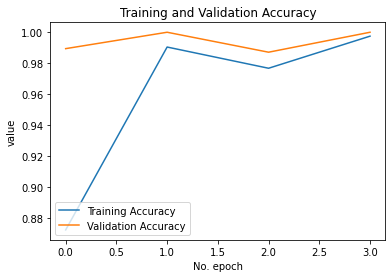

In [ ]:
# accuracy visualization
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="lower left")
plt.show()

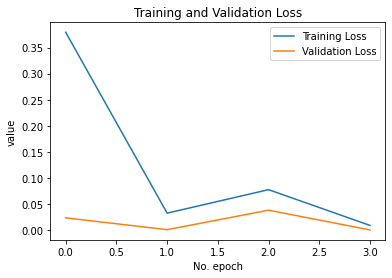

In [ ]:
# Loss visualization
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()

In [ ]:
# save file to tflite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpr_hfwmp0/assets
